In [ ]:
install.packages('TSA')
install.packages('forecast')
install.packages('tseries')
install.packages('normtest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’, ‘leaps’, ‘locfit’, ‘tseries’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('xts')
library(xts)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
library(TSA)
library(forecast)
library(tseries)
library(normtest)


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 



In [ ]:
load(url("https://userpage.fu-berlin.de/soga/300/30100_data_sets/Earth_Surface_Temperature.RData"))

In [ ]:
library(xts)
t.global  <- apply.yearly(t.global, mean)

In [ ]:
t.global <- na.omit(t.global)
t.global

Warning message:
“index class is yearmon, which does not support timezones.
Expected 'UTC' timezone, but tzone is ‘’”


         Monthly.Anomaly.Global Monthly.Unc.Global
Dec 1753           -0.475000000         2.67583333
Dec 1754           -0.359000000         2.88458333
Dec 1755           -0.457916667         3.03675000
Dec 1756            0.020666667         2.79458333
Dec 1757            0.125000000         3.04366667
Dec 1758           -2.024250000         3.04175000
Dec 1759           -0.870083333         3.17783333
Dec 1760           -1.655833333         2.94716667
Dec 1761           -0.088333333         2.92375000
Dec 1762           -0.304500000         3.31966667
Dec 1763           -1.257500000         2.80575000
Dec 1764           -0.126750000         2.86966667
Dec 1765           -0.197333333         2.67908333
Dec 1766           -0.076500000         2.66825000
Dec 1767           -0.208916667         2.35616667
Dec 1768           -1.756166667         3.14808333
Dec 1769           -0.746500000         3.36375000
Dec 1770           -0.875916667         2.79783333
Dec 1771           -0.650500000

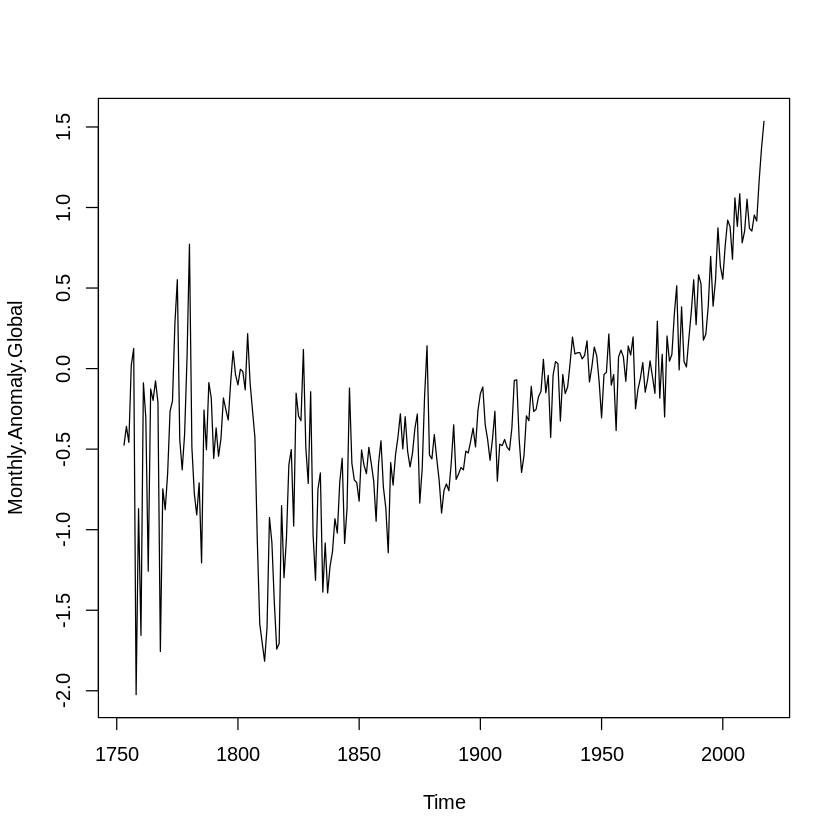

In [ ]:
tempts <- ts(t.global$Monthly.Anomaly.Global,frequency = 1, start=c(1753))
plot(tempts)

In [ ]:
adf.test(tempts)


	Augmented Dickey-Fuller Test

data:  tempts
Dickey-Fuller = -2.8751, Lag order = 6, p-value = 0.2073
alternative hypothesis: stationary


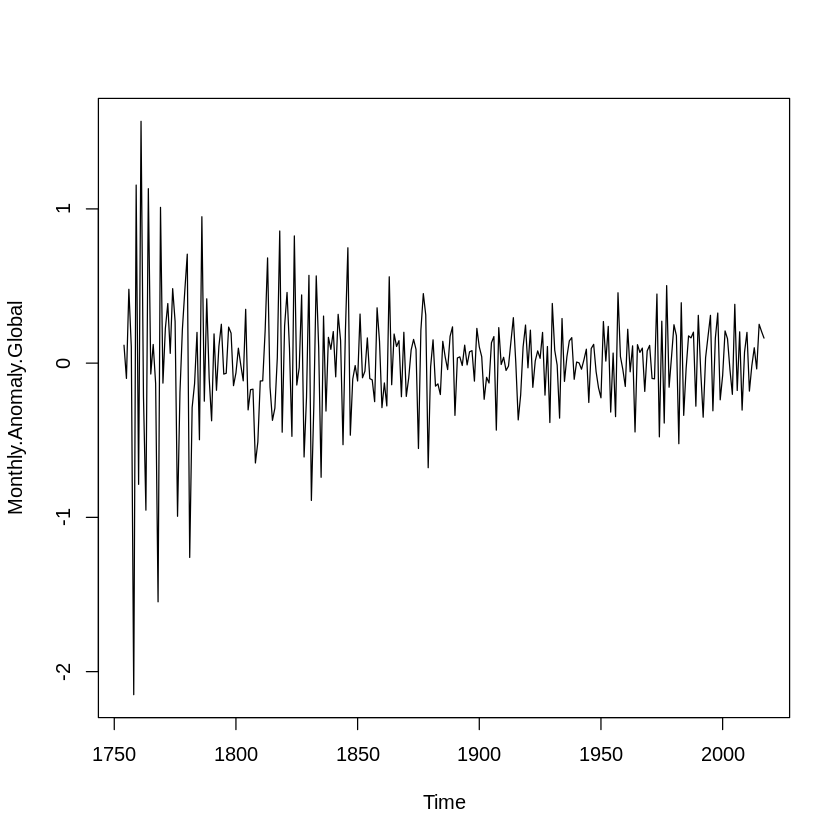

In [ ]:
difftemp <- diff(tempts)
plot(difftemp)

In [ ]:
adf.test(difftemp)

Warning message in adf.test(difftemp):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  difftemp
Dickey-Fuller = -9.3364, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x o o o x o x x o o o  o  o  o 
1 x o o o x o x x o o o  o  o  o 
2 x o o o o o o x o o o  o  o  o 
3 x x x o o o o o o o o  o  o  o 
4 o o x x o o o o o o x  x  o  o 
5 x o x x o o o o o o o  o  o  o 
6 o o x o x o o o o o x  o  o  o 
7 x o x x x o o o o o o  o  o  o 


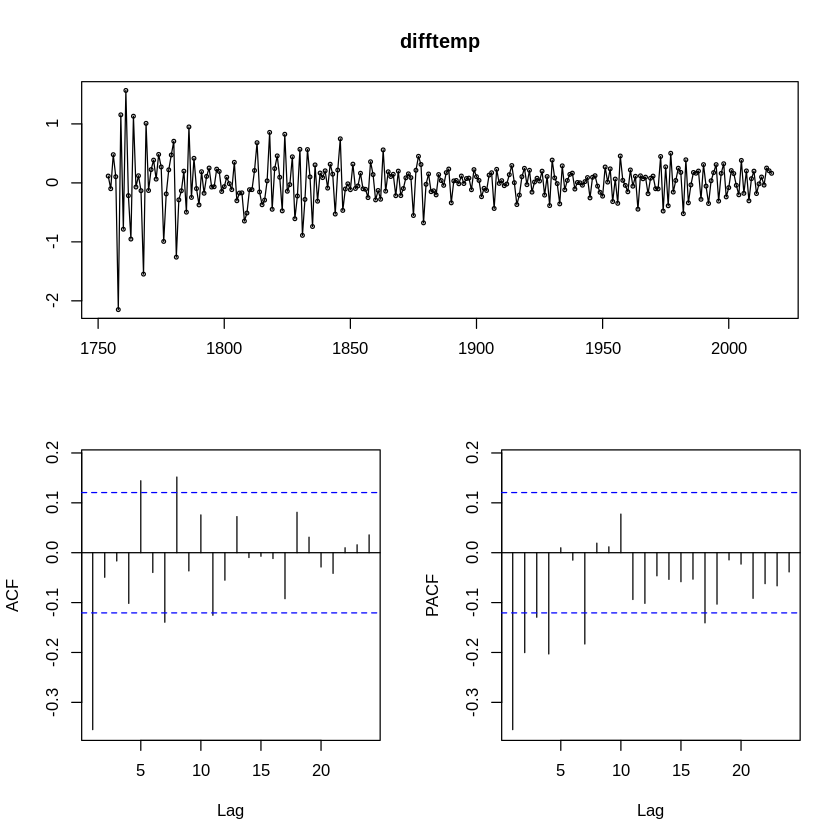

In [ ]:
tsdisplay(difftemp)
eacf(difftemp)

In [ ]:
#Dari hasil plot acf, pacf, dan eacf nya, maka akan dicoba beberapa model yang kemungkinan cocok
model1 <- Arima(tempts, order=c(0,1,1))
model2 <- Arima(tempts, order=c(1,1,1))
model3 <- Arima(tempts, order=c(2,1,1))
model4 <- Arima(tempts, order=c(3,1,0))

In [ ]:
model1
model2
model3
model4
cbind(model1,model2,model3,model4)

Series: tempts 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.5540
s.e.   0.0628

sigma^2 = 0.115:  log likelihood = -88.75
AIC=181.5   AICc=181.55   BIC=188.65

Series: tempts 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.3217  -0.8043
s.e.  0.1381   0.1050

sigma^2 = 0.1129:  log likelihood = -85.92
AIC=177.83   AICc=177.92   BIC=188.56

Series: tempts 
ARIMA(2,1,1) 

Coefficients:
         ar1     ar2      ma1
      0.3889  0.1144  -0.8921
s.e.  0.0813  0.0726   0.0511

sigma^2 = 0.1123:  log likelihood = -84.85
AIC=177.71   AICc=177.86   BIC=192.01

Series: tempts 
ARIMA(3,1,0) 

Coefficients:
          ar1      ar2      ar3
      -0.4510  -0.2551  -0.1307
s.e.   0.0611   0.0652   0.0611

sigma^2 = 0.1177:  log likelihood = -90.84
AIC=189.68   AICc=189.83   BIC=203.98

model1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
coef      -0.5540458                                                                                                                                                           

In [ ]:
#Modelnya adalah ARIMA(1,1,1)
fit<-Arima(tempts,order=c(1,1,1))
fit

Series: tempts 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.3217  -0.8043
s.e.  0.1381   0.1050

sigma^2 = 0.1129:  log likelihood = -85.92
AIC=177.83   AICc=177.92   BIC=188.56


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)
Q* = 12.147, df = 8, p-value = 0.1447

Model df: 2.   Total lags used: 10



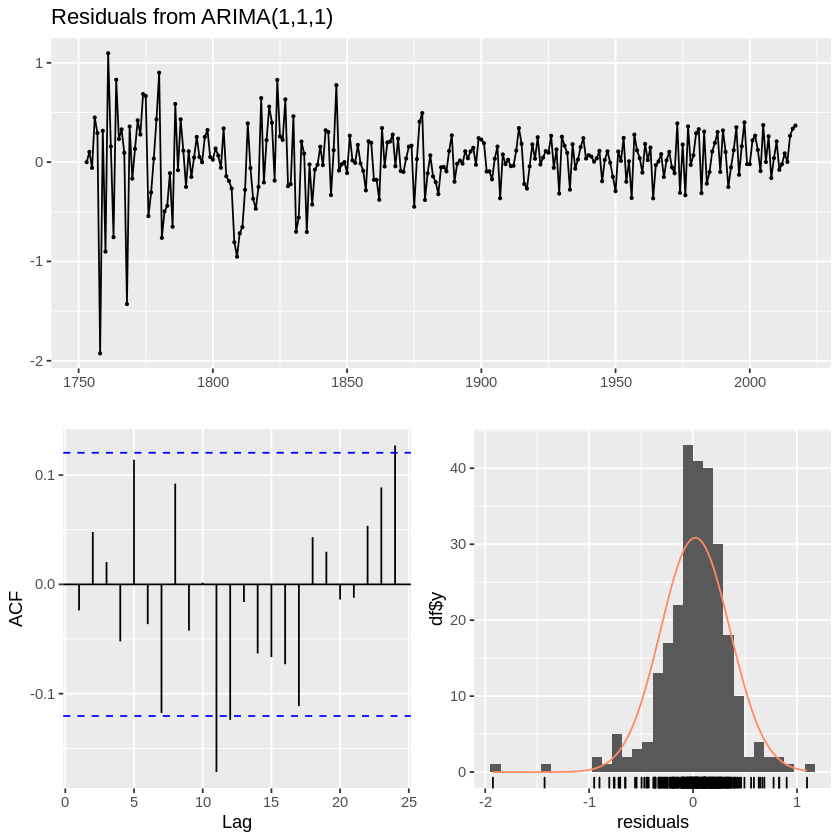

In [ ]:
#cek independensi residual
#h0 = residual tidak mengandung korelasi
#h1 = residual mengandung korelasi
checkresiduals(fit)

In [ ]:
#cek normalitas residual
#h0 = residual berdistribusi normal
#h1 = residual tidak berdistribusi normal
jb.norm.test(tempts,nrepl=2000)


	Jarque-Bera test for normality

data:  tempts
JB = 4.9738, p-value = 0.0755


In [ ]:
overfit1 <- Arima(tempts, order=c(2,1,1))
overfit2 <- Arima(tempts, order=c(1,1,2))
overfit1
overfit2
cbind(fit, overfit1, overfit2)

Series: tempts 
ARIMA(2,1,1) 

Coefficients:
         ar1     ar2      ma1
      0.3889  0.1144  -0.8921
s.e.  0.0813  0.0726   0.0511

sigma^2 = 0.1123:  log likelihood = -84.85
AIC=177.71   AICc=177.86   BIC=192.01

Series: tempts 
ARIMA(1,1,2) 

Coefficients:
         ar1      ma1     ma2
      0.7129  -1.2291  0.2883
s.e.  0.1411   0.1705  0.1384

sigma^2 = 0.1121:  log likelihood = -84.52
AIC=177.04   AICc=177.19   BIC=191.34

fit                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
coef      0.3217046, -0.8042785                                                                                                                                                  

,actual,forecast2.Point Forecast,forecast2.Lo 80,forecast2.Hi 80,forecast2.Lo 95,forecast2.Hi 95
2013,0.953250,0.8566329,0.4244246,1.288841,0.19562730,1.517638
2014,0.915750,0.8576235,0.3715563,1.343691,0.11424780,1.600999
2015,1.167417,0.8579639,0.3491919,1.366736,0.07986420,1.636064
2016,1.372500,0.8580809,0.3340546,1.382107,0.05665178,1.659510
2017,1.535000,0.8581211,0.3211913,1.395051,0.03695787,1.679284


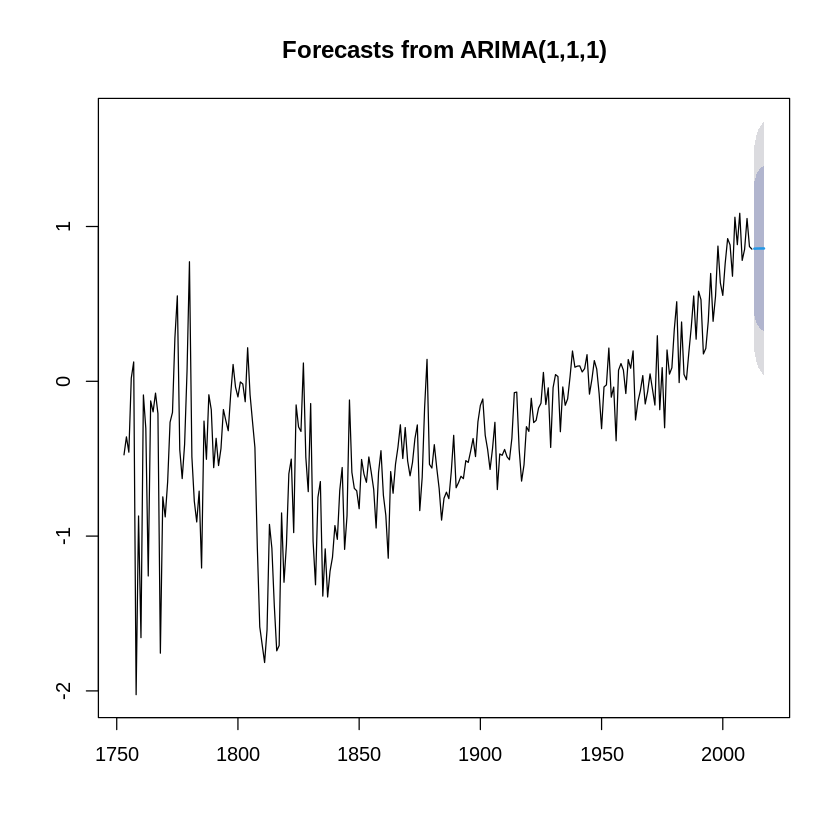

In [ ]:
#1753-2017
actual=window(tempts, start=c(2013))
tempts2=window(tempts, end=c(2012))
fit2 <- Arima(tempts2, order=c(1,1,1))
forecast2 <- forecast(fit2, h=5)
plot(forecast2)
cbind(actual, forecast2)

     Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
2018       1.291527 0.8609688 1.722086 0.6330450 1.950009
2019       1.213201 0.7284201 1.697982 0.4717927 1.954609
2020       1.188003 0.6787589 1.697247 0.4091813 1.966825
2021       1.179897 0.6532065 1.706587 0.3743935 1.985400
2022       1.177289 0.6353816 1.719196 0.3485132 2.006064

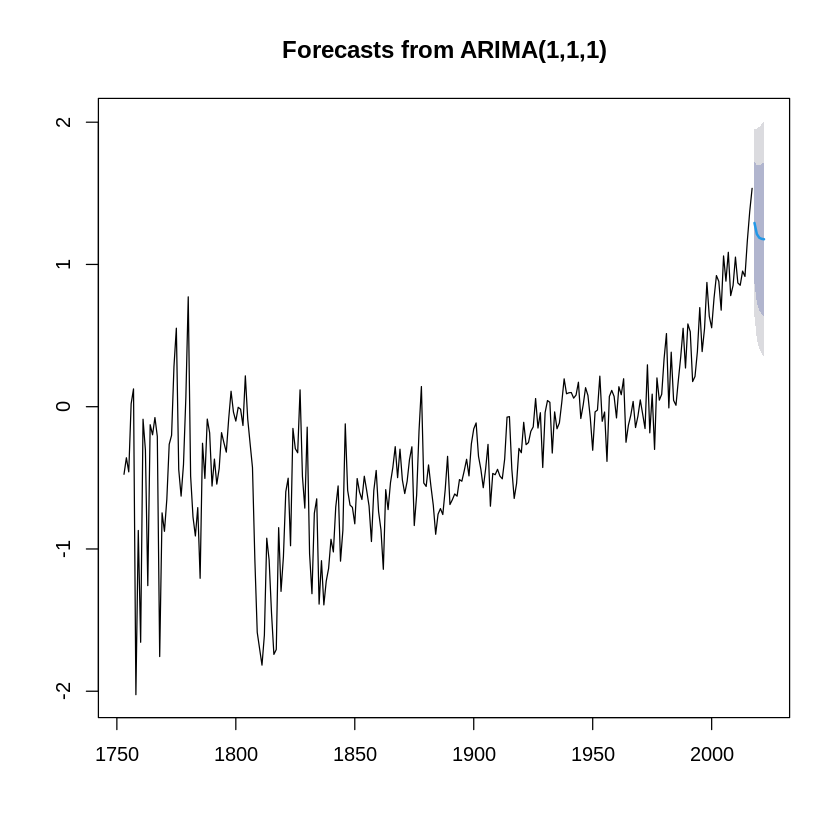

In [ ]:
forecast <- forecast(fit, h=5)
plot(forecast)
forecast
